# Applied Machine Learning - Assignment 1

Welcome to the first assignment of the Applied Machine Learning course. This notebook will guide you through various machine learning techniques applied to the well-known Wine dataset and the Pollen dataset. Each part of the assignment aims to solidify the concepts discussed in lectures through hands-on practice.


**Instructor:** Prof. Moshe Sipper  
**Teaching Assistant:** Raz Lapid  
**Spring 2024**

---

# Part 1: Wine Dataset Analysis

## Objective
This notebook focuses on exploring and analyzing the Wine dataset. We will employ logistic regression to classify wine types based on their chemical properties. Key tasks include data loading, initial data analysis, model training with various test splits, and label balancing for improved model accuracy.

### Dataset Source
The Wine dataset can be accessed through [Scikit-learn's dataset library](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

## Setup



In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
# Set up for visualizations
plt.style.use('ggplot')

# Load the wine dataset
wine_data = load_wine()
data = wine_data['data']
target = wine_data['target']
wine_df = pd.DataFrame(data=np.c_[data, target],
                       columns=wine_data['feature_names'] + ['target'])

# Display the first few rows of the dataset
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Step 2: Preliminary Data Analysis

Provide statistical summaries and explore the dataset's properties.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

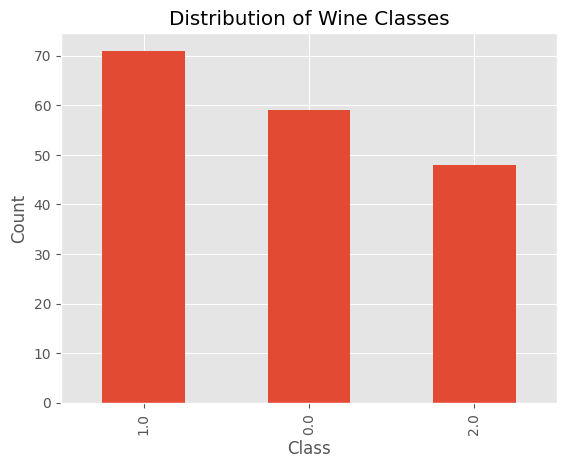

In [ ]:
# Summary statistics
wine_df.describe()

# Information about the dataset including data types and null values
wine_df.info()

# Distribution of target variable
wine_df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Wine Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

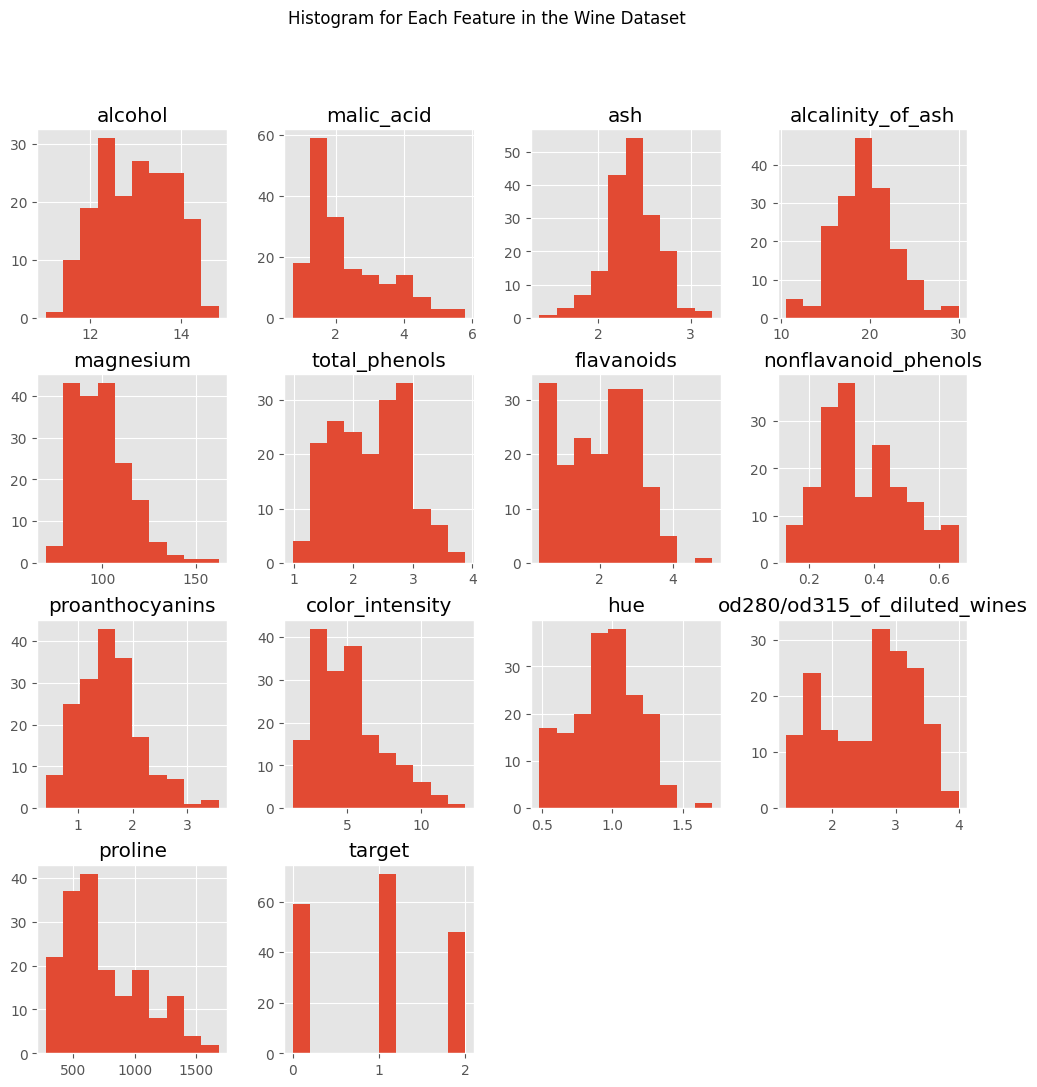

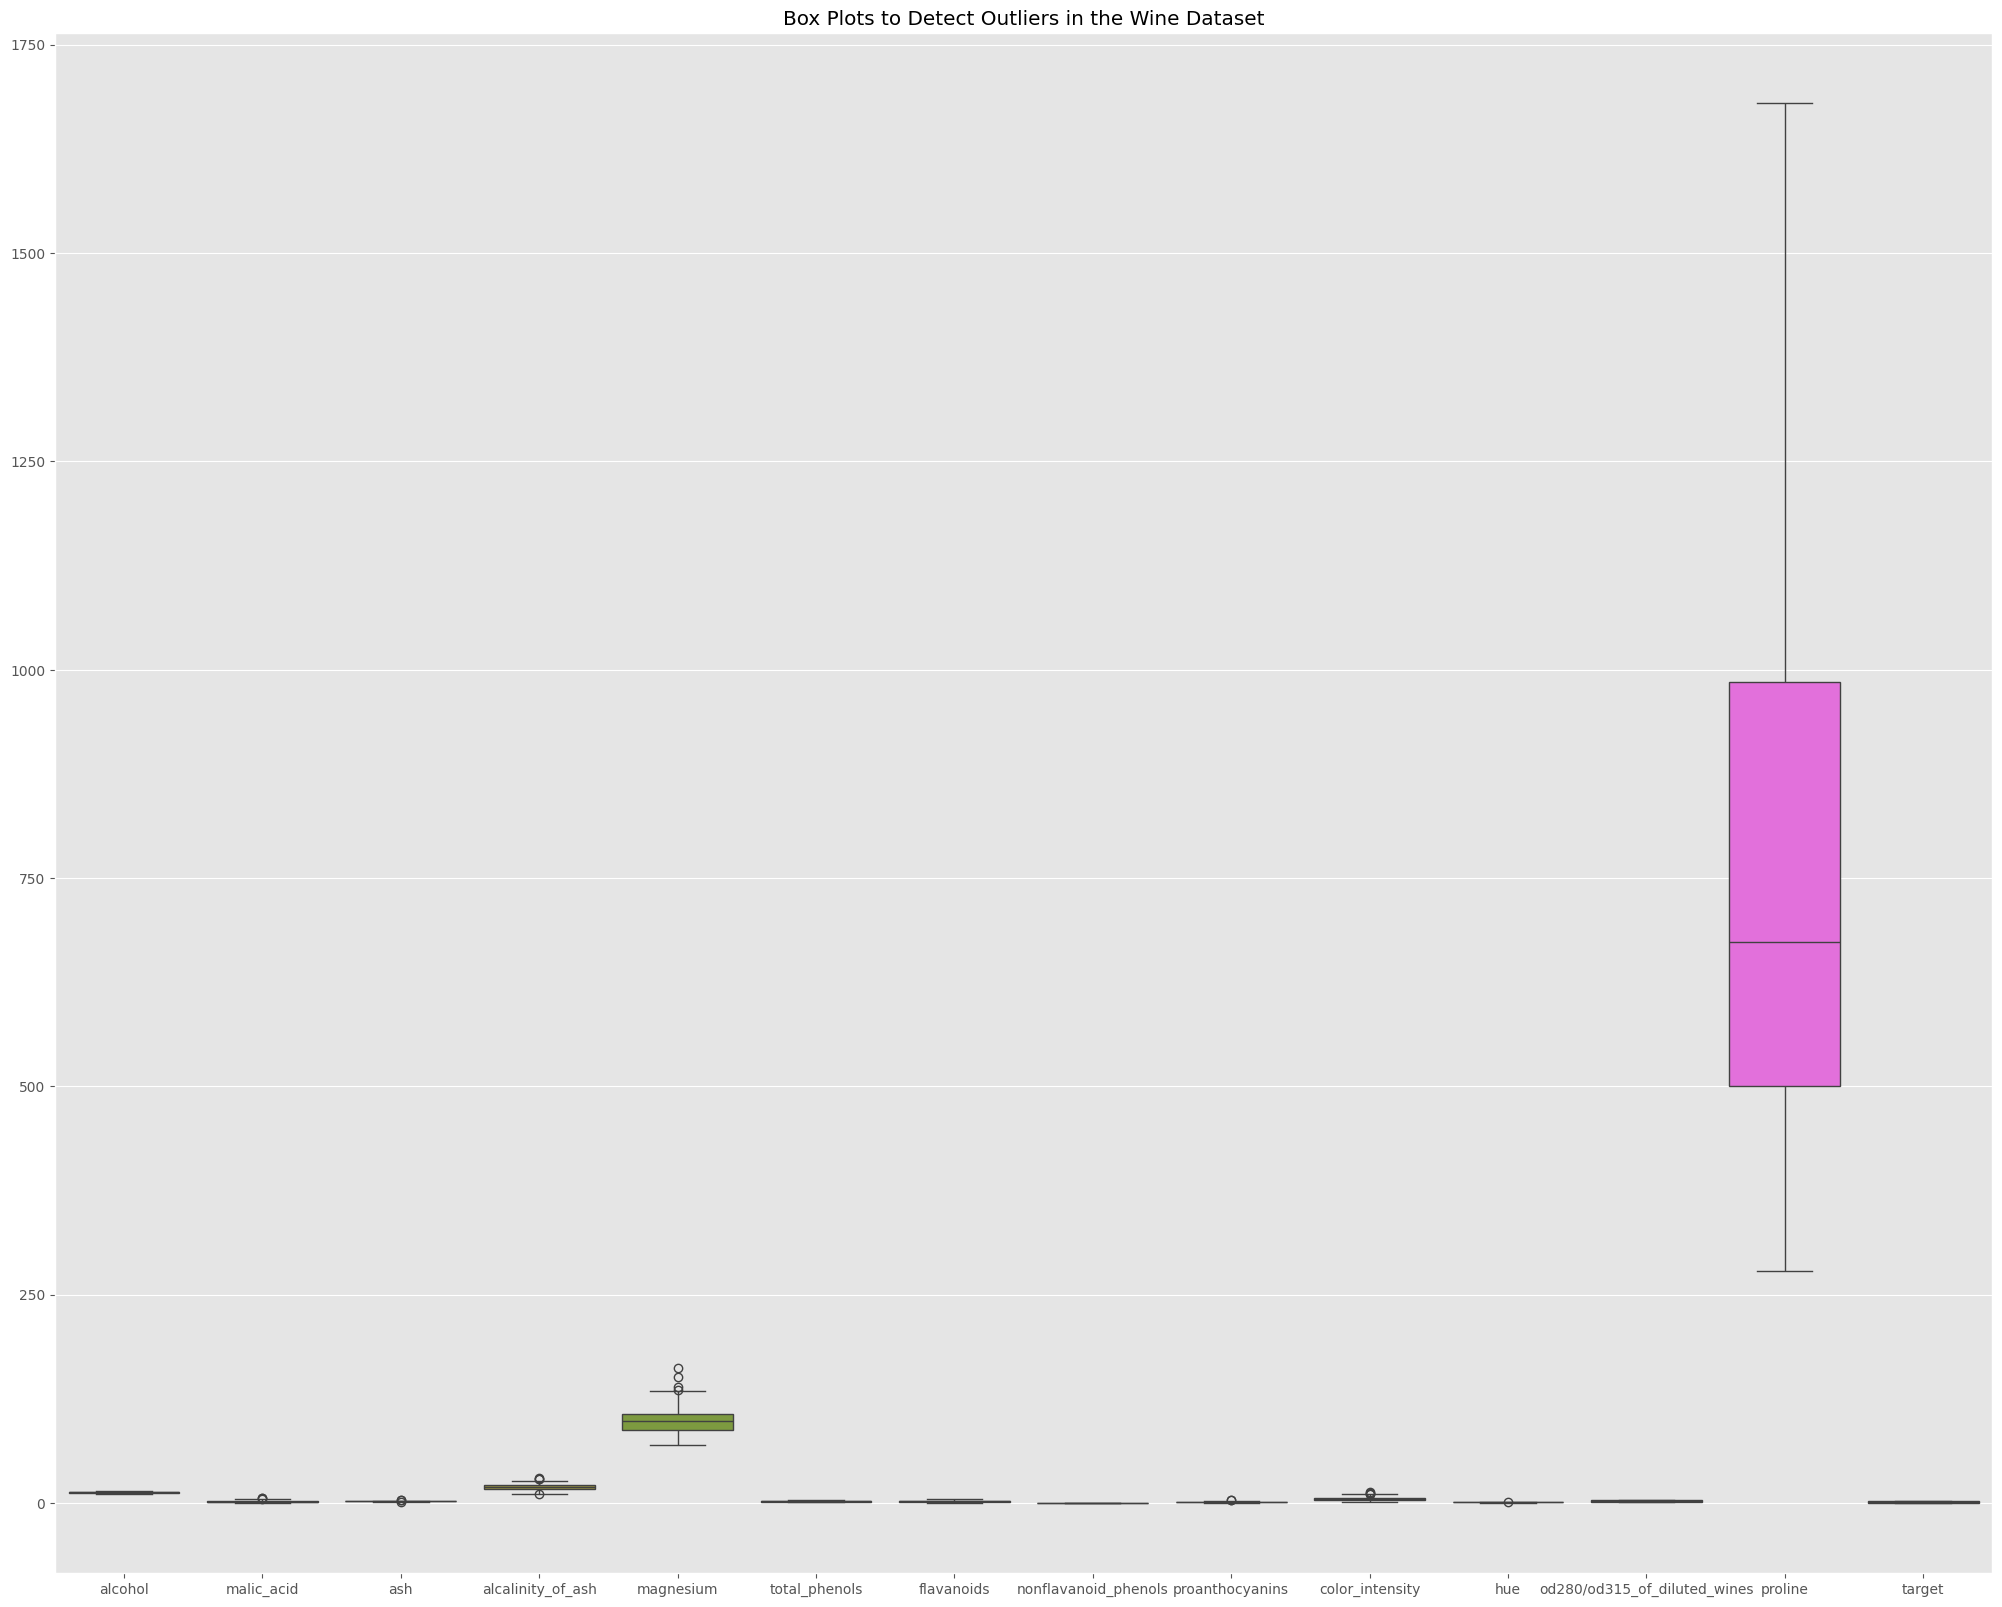

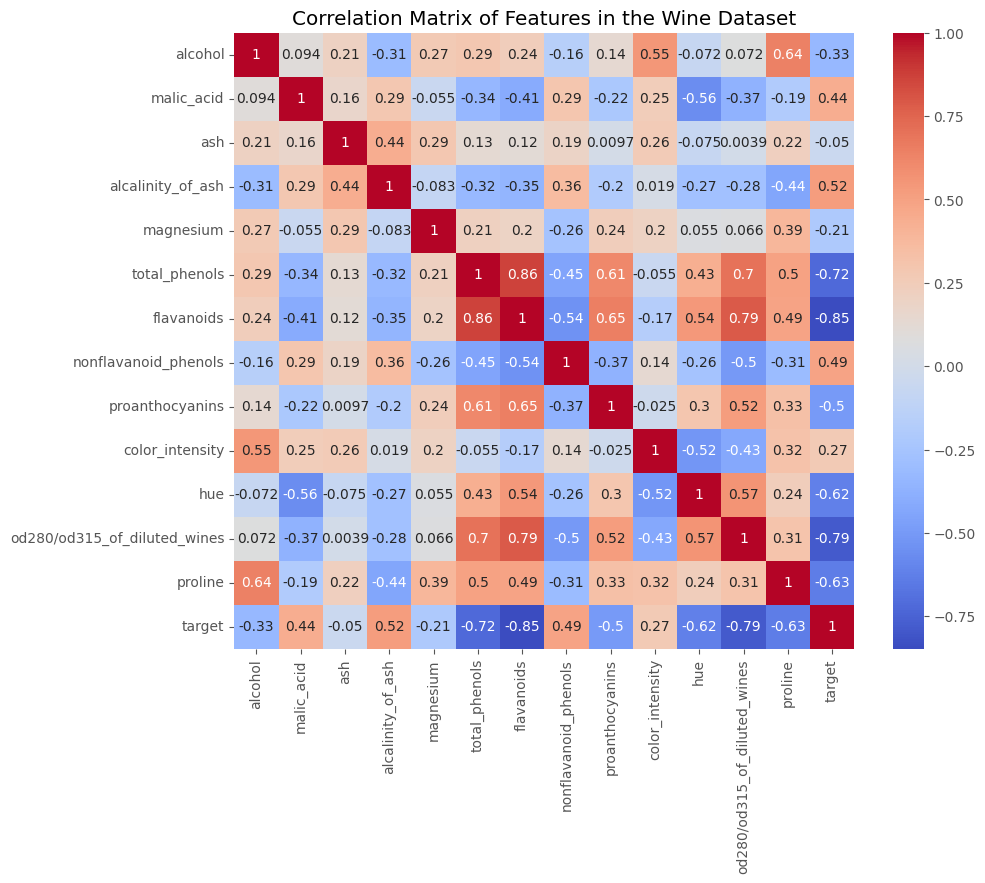

In [ ]:
# Plot histogram for each feature in the dataset
wine_df.hist(figsize=(12, 12))
plt.suptitle('Histogram for Each Feature in the Wine Dataset')
plt.show()

# Box plots to detect outliers
plt.figure(figsize=(25, 20))
sns.boxplot(data=wine_df)
plt.title('Box Plots to Detect Outliers in the Wine Dataset')
plt.show()

# Correlation matrix
corr_matrix = wine_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features in the Wine Dataset')
plt.show()


In [ ]:
# Print the mean of each feature
wine_df.mean()

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
target                            0.938202
dtype: float64

### Conclusion

Based on the preliminary data analysis performed on the Wine dataset, we can draw several insights and observations:

#### 1. Summary Statistics and Data Structure
- The dataset consists of 178 samples, each with 13 features and a target variable.
- All features are of type `float64`, indicating continuous numerical data.
- The dataset does not contain any missing values, ensuring completeness.

#### 2. Distribution of Target Variable
- The target variable represents three wine classes (0, 1, 2), with class 1 being the most frequent and class 2 being the least frequent.
- The distribution is slightly imbalanced, which might need to be considered when training models.

#### 3. Feature Distributions
- Histograms show the distribution of each feature. Most features appear to be normally distributed, though some, like `proline` and `color_intensity`, exhibit right-skewed distributions.
- Understanding these distributions helps in identifying any necessary transformations or normalizations needed before model training.

#### 4. Outlier Detection
- Box plots highlight potential outliers in features such as `magnesium`, `alcalinity_of_ash`, and `proline`.
- Outliers may significantly affect model performance, so considering strategies to handle them (e.g., removal or transformation) is essential.

#### 5. Correlation Analysis
- The correlation matrix and heatmap reveal strong correlations between several features:
  - `total_phenols` and `flavanoids` have a high positive correlation.
  - `od280/od315_of_diluted_wines` shows a strong positive correlation with `flavanoids`.
  - `proline` is highly correlated with `alcohol` and `color_intensity`.
- Strong correlations between features suggest potential multicollinearity, which can be addressed by techniques like PCA or feature selection.

#### 6. Mean of Features
- The mean values of features provide a quick overview of central tendencies:
  - For example, the average `alcohol` content is approximately 13%, and the average `magnesium` content is around 99.7 mg/L.
- These values set the baseline for comparing individual samples or subsets.

### Visualizations and Interpretation
- The visualizations, including histograms, box plots, and the heatmap, provide an intuitive understanding of the data's distribution, outliers, and relationships.
- The plots suggest that feature scaling (e.g., standardization or normalization) might be beneficial, especially given the varying ranges of features like `proline` and `alcohol`.

Overall, this preliminary analysis highlights the importance of understanding the dataset's structure and characteristics before diving into more complex modeling. The insights gained here will guide the preprocessing steps and model selection in subsequent analyses.


Step 3: Data Splitting and Model Training

Train logistic regression models over various test sizes and plot their accuracies.

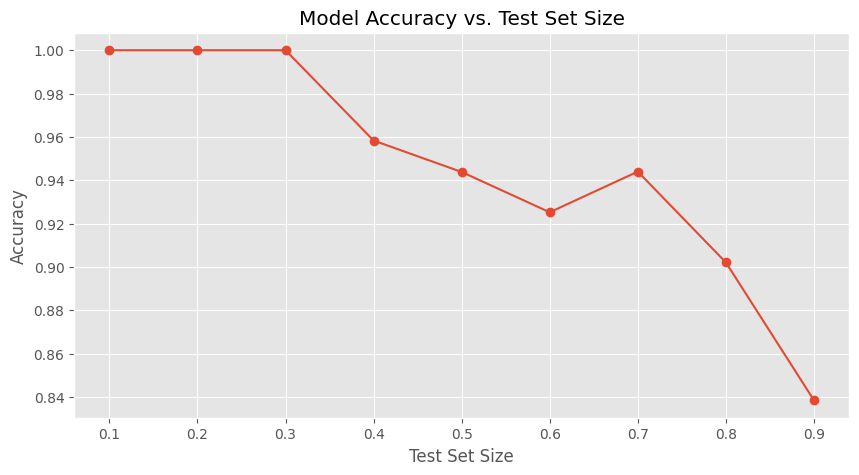

In [ ]:
# Splitting the data into train and test sets for different ratios and training models r ∈ [0.1, 0.2, 0.3, ..., 0.9]
test_sizes = np.arange(0.1, 1.0, 0.1)
accuracies = []

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        wine_df[wine_data.feature_names], wine_df['target'], test_size=size, random_state=42)

    # Training the logistic regression model
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)

    # Evaluating the model
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, accuracies, marker='o')
plt.title('Model Accuracy vs. Test Set Size')
plt.xlabel('Test Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


It seems that the accuracy are the same in 0.1 to 0.3 and then reducing from 0.3 to 0.9. with a little bit increasing in 0.7

Step 4: Implementing Label Balancing

Here's how you can balance the dataset by undersampling.

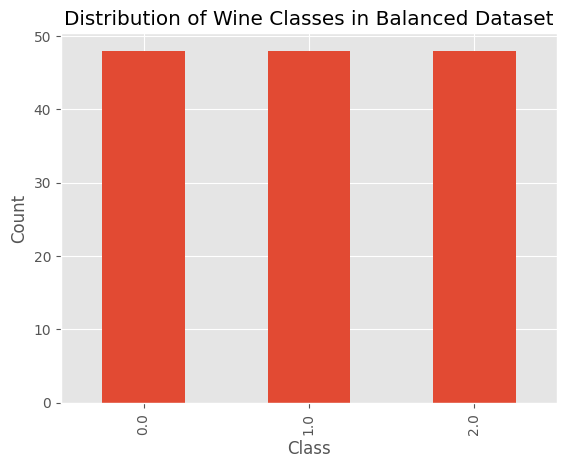

In [ ]:
# Finding the minimum samples per class
min_samples = wine_df['target'].value_counts().min()

# Creating a balanced dataset
balanced_df = pd.DataFrame()

for label in wine_df['target'].unique():
    balanced_df = pd.concat([balanced_df, wine_df[wine_df['target'] == label].sample(min_samples, random_state=42)])

# Confirm the balancing
balanced_df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Wine Classes in Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Step 5: Data Splitting and Model Training after the balancing

Train logistic regression models over various test sizes on balancing data and plot their accuracies.

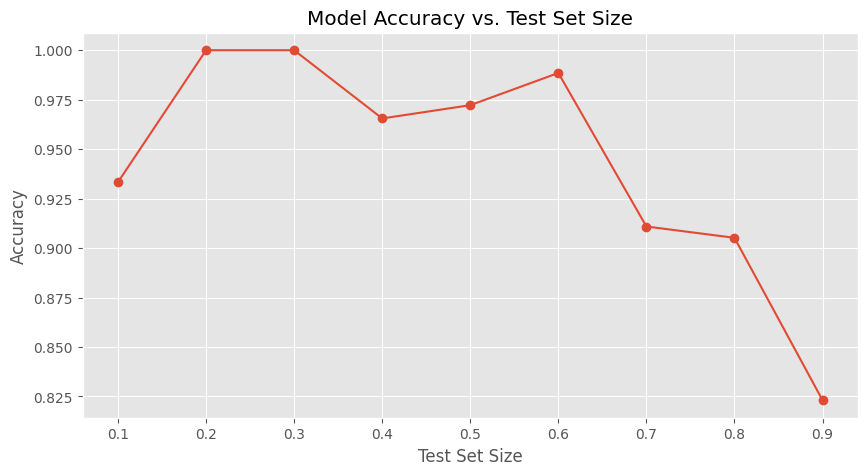

In [ ]:
# Splitting the data into train and test sets for different ratios and training models r ∈ [0.1, 0.2, 0.3, ..., 0.9]
test_sizes = np.arange(0.1, 1.0, 0.1)
accuracies = []

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        balanced_df[wine_data.feature_names], balanced_df['target'], test_size=size, random_state=42)

    # Training the logistic regression model
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)

    # Evaluating the model
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, accuracies, marker='o')
plt.title('Model Accuracy vs. Test Set Size')
plt.xlabel('Test Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

We can see that adain 0.2 and 0.3 is the best ratio, but also 0.6 pretty close to it accuracy.

Step 5: Naive k-Features Selection Algorithm

In [ ]:
from itertools import combinations
def evaluate_feature_subset(X_train, X_test, y_train, y_test, features):
    """
    Trains and evaluates a logistic regression model on the given feature subset.

    Args:
    - X_train, X_test: The training and testing data.
    - y_train, y_test: The training and testing labels.
    - features: List of features to use in the model.

    Returns:
    - accuracy: The accuracy of the model on the test set.
    """
    # Select only the specified subset of features
    X_train_subset = X_train[list(features)]
    X_test_subset = X_test[list(features)]

    # Train the logistic regression model
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train_subset, y_train)

    # Predict and calculate accuracy
    predictions = model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

def k_features_selection(X_train, X_test, y_train, y_test, k):
    """
    Evaluates all combinations of k features and returns the subset with the highest accuracy.

    Args:
    - X_train, X_test: The training and testing data.
    - y_train, y_test: The training and testing labels.
    - k: The number of features to select.

    Returns:
    - best_features: The best feature set of size k.
    - best_accuracy: The highest accuracy achieved with the best feature set.
    """
    best_accuracy = 0
    best_features = None

    # Generate all possible combinations of k features
    for features in combinations(X_train.columns, k):
        accuracy = evaluate_feature_subset(X_train, X_test, y_train, y_test, features)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = features

    return best_features, best_accuracy


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    wine_df[wine_data.feature_names], wine_df['target'], test_size=0.1, random_state=42)

# Run the feature selection with k = 2
best_features, best_accuracy = k_features_selection(X_train, X_test, y_train, y_test, 2)

print("Best Features:", best_features)
print("Best Accuracy:", best_accuracy)

Best Features: ('alcohol', 'proline')
Best Accuracy: 1.0
